In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import july

In [2]:
# Load Parquet

ft4_2023_df = pd.read_parquet('./ft4_2023_files.parquet.gzip') 

# Extract daily file counts
idx = pd.date_range(start='2023-01-01', end='2023-12-31', freq='1d')

ft4_2023_daily_counts = ft4_2023_df.groupby(pd.Grouper(key='datetime', freq='1d')).count()
ft4_2023_daily_counts = ft4_2023_daily_counts.reindex(idx, fill_value=0)
ft4_2023_daily_counts

,filename,byte_size,hash,ts_seconds
2023-01-01,0,0,0,0
2023-01-02,0,0,0,0
2023-01-03,80,80,80,80
2023-01-04,288,288,288,288
2023-01-05,244,244,244,244
...,...,...,...,...
2023-12-27,288,288,288,288
2023-12-28,288,288,288,288
2023-12-29,288,288,288,288
2023-12-30,288,288,288,288


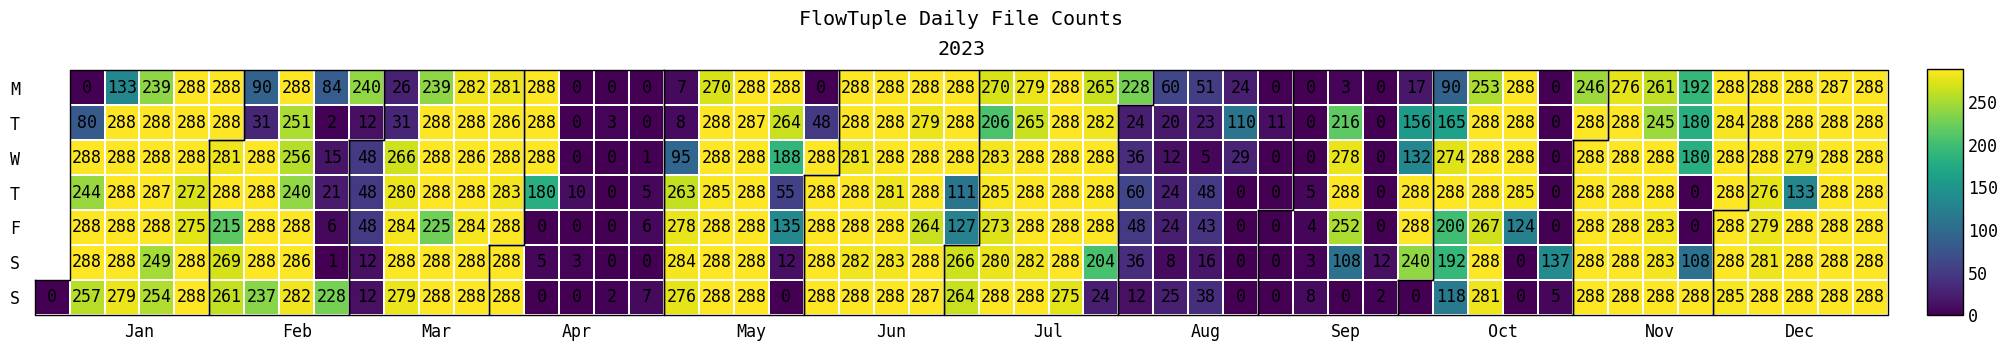

In [8]:
# Plot as heatmap

plt.figure(figsize=(24, 5))

july.heatmap(
    ft4_2023_daily_counts.index, 
    ft4_2023_daily_counts.filename, 
    cmap="viridis", 
    colorbar=True, 
    title="FlowTuple Daily File Counts",
    value_label=True,
    ax=plt.gca(),
    month_grid=True
)

plt.show()